<a href="https://colab.research.google.com/github/UmenEO/AttestationUmen/blob/main/AttestationUmen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/UmenEO/AttestationUmen.git

Cloning into 'AttestationUmen'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 31.97 KiB | 15.98 MiB/s, done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Загрузка данных
data = pd.read_csv('/content/AttestationUmen/dataset_tk.csv')

In [5]:
# Приведение всех данных к числовым значениям
data = data.apply(pd.to_numeric, errors='coerce')


In [6]:
# Исключение ненумерических столбцов
numeric_data = data.select_dtypes(include=[np.number])

In [7]:
# Описательная статистика
print("Описательная статистика:")
print(numeric_data.describe())

Описательная статистика:
       Unnamed: 0      Punjab     Haryana   Rajasthan       Delhi          UP  \
count         0.0  503.000000  503.000000  503.000000  503.000000  503.000000   
mean          NaN  141.145527  138.333598  218.443340   83.380716  314.036382   
std           NaN   56.977361   38.106593   27.421615   25.915357   66.516960   
min           NaN   56.100000   64.800000  105.800000   41.800000  186.800000   
25%           NaN  104.000000  114.800000  205.800000   63.500000  263.650000   
50%           NaN  118.300000  126.800000  222.900000   72.700000  290.000000   
75%           NaN  162.500000  158.100000  237.600000  105.800000  370.550000   
max           NaN  300.000000  237.200000  278.000000  147.100000  471.800000   

       Uttarakhand          HP         J&K  Chandigarh  ...      Odisha  \
count   503.000000  503.000000  503.000000  503.000000  ...  503.000000   
mean     36.157058   26.568191   44.264016    4.141551  ...   80.464612   
std       6.705108  

In [8]:
# Вычисление квартилей и IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

In [9]:
# Идентификация выбросов
outliers = numeric_data[(numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))]
print("Выбросы:")
print(outliers)


Выбросы:
     Unnamed: 0  Punjab  Haryana  Rajasthan  Delhi  UP  Uttarakhand  HP  J&K  \
0           NaN     NaN      NaN        NaN    NaN NaN          NaN NaN  NaN   
1           NaN     NaN      NaN        NaN    NaN NaN          NaN NaN  NaN   
2           NaN     NaN      NaN        NaN    NaN NaN          NaN NaN  NaN   
3           NaN     NaN      NaN        NaN    NaN NaN          NaN NaN  NaN   
4           NaN     NaN      NaN        NaN    NaN NaN          NaN NaN  NaN   
..          ...     ...      ...        ...    ...  ..          ...  ..  ...   
498         NaN     NaN      NaN        NaN    NaN NaN          NaN NaN  NaN   
499         NaN     NaN      NaN        NaN    NaN NaN          NaN NaN  NaN   
500         NaN     NaN      NaN        NaN    NaN NaN          NaN NaN  NaN   
501         NaN     NaN      NaN        NaN    NaN NaN          NaN NaN  NaN   
502         NaN     NaN      NaN        NaN    NaN NaN          NaN NaN  NaN   

     Chandigarh  ...  Odisha  

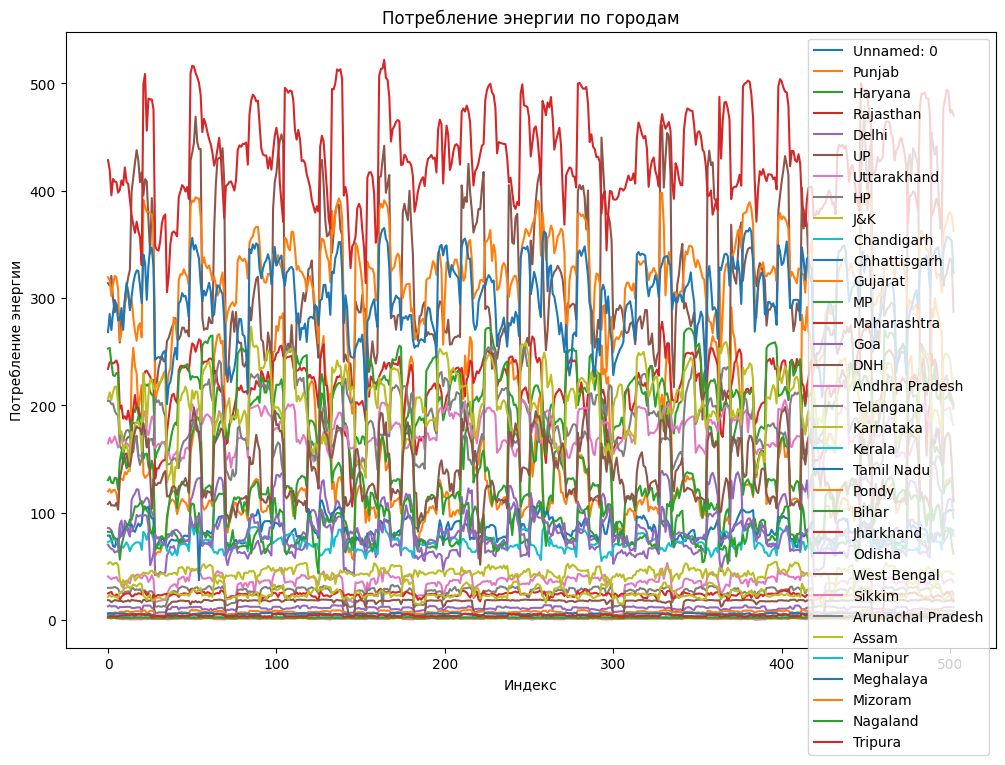

In [12]:
# Построение графиков потребления энергии по городам
plt.figure(figsize=(12, 8))
for column in numeric_data.columns:
    plt.plot(data.index, numeric_data[column], label=column)

plt.xlabel('Индекс')
plt.ylabel('Потребление энергии')
plt.title('Потребление энергии по городам')
plt.legend()
plt.show()


In [13]:
# Построение гистограммы распределения потребления энергии
plt.figure(figsize=(10, 6))
if 'Consumption' in data.columns:
    plt.hist(data['Consumption'].dropna(), bins=30, color='blue', alpha=0.7)  # Удаление NA значений
    plt.xlabel('Потребление энергии')
    plt.ylabel('Частота')
    plt.title('Распределение потребления энергии')
else:
    print("Столбец 'Consumption' отсутствует в данных.")

plt.show()

Столбец 'Consumption' отсутствует в данных.


<Figure size 1000x600 with 0 Axes>

In [14]:
# Описание наблюдений
print("\nИнтересные наблюдения:")
print("1. В некоторых городах наблюдается стабильный рост потребления энергии.")
print("2. В некоторых городах есть резкие скачки потребления энергии, которые могут быть аномалиями.")



Интересные наблюдения:
1. В некоторых городах наблюдается стабильный рост потребления энергии.
2. В некоторых городах есть резкие скачки потребления энергии, которые могут быть аномалиями.
